In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
}else{
$('div.input').show();
}
code_show = !code_show
}
$(document).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# 1. Introduction

The purpose of this project is to explore and approprietly visualise data in a board games dataset, with a focus on visualisations' design. The visualisations produced shall be appealing and engaging, while maintaining readability and transparency. 

The dataset has 10532 entries and 22 columns. It will be analysed in order to explore statistical insights about board games.

When making any significant changes, a new dataset will be created, based on df_org - this is to ensure a clear flow, in case if it's needed to use any previous version of changed dataset. 

# 2. EDA & cleaning the dataset

## 2.1. Data exploration

In [2]:
# Importing relevant libraries and packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [3]:
# Reading the dataset

df_org = pd.read_csv('board_games.csv')

In [4]:
# Displaying the first 10 rows of the dataset

df_org.head(10)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195
5,6,"In the ancient lands along the Mediterranean, ...",//cf.geekdo-images.com/images/pic28424.jpg,6,240,12,2,240,Mare Mediterraneum,240,...,Jean du Poël,"Civilization,Nautical",NaN,Jean du Poël,NaN,Cities: Marseille,Dice Rolling,Historien Spiele Galerie (Historien Spielegale...,6.52534,73
6,7,"In Cathedral, each player has a set of pieces ...",//cf.geekdo-images.com/images/pic181642.jpg,2,20,8,2,20,Cathedral,20,...,S. Mattusek,Abstract Strategy,NaN,Robert P. Moore,NaN,"Combinatorial,Polyominoes","Area Enclosure,Pattern Building,Pattern Recogn...","Brightway Products Ltd,Falomir Juegos,Family G...",6.50534,2751
7,8,"In this interesting offering from Warfrog, pla...",//cf.geekdo-images.com/images/pic374320.jpg,5,120,12,2,120,Lords of Creation,120,...,Bryan King,"Civilization,Fantasy",NaN,Martin Wallace,NaN,NaN,Modular Board,"Vendetta,Warfrog Games",6.14538,186
8,9,"Although referred to as a sequel to El Grande,...",//cf.geekdo-images.com/images/pic1731731.jpg,4,90,13,2,90,El Caballero,90,...,Doris Matthäus,Exploration,NaN,"Wolfgang Kramer,Richard Ulrich",NaN,El Grande,"Area Control / Area Influence,Tile Placement","999 Games,Hans im Glück Verlags-GmbH,Rio Grand...",6.51776,1263
9,10,Elfenland is a redesign of the original White ...,//cf.geekdo-images.com/images/pic1798136.jpg,6,60,10,2,60,Elfenland,60,...,Doris Matthäus,"Fantasy,Travel",NaN,Alan R. Moon,"Elfengold,Elfenland: Back to the Roads,Elfenla...","Elfen Travel,Fairies, Elves and Pixies","Card Drafting,Hand Management,Point to Point M...","999 Games,AMIGO Spiel + Freizeit GmbH,Corfix,H...",6.74996,6729


In [5]:
# Number of columns and rows in the dataset

df_org.shape

(10532, 22)

In [6]:
# Concise summary of the dataframe

df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [7]:
# Statistical summary of numerical data

df_org.describe().T

,count,mean,std,min,25%,50%,75%,max
game_id,10532.0,62059.203095,66223.716828,1.00000,5444.500000,28822.500000,126409.500000,216725.00000
max_players,10532.0,5.657330,18.884403,0.00000,4.000000,4.000000,6.000000,999.00000
max_playtime,10532.0,91.341436,659.754400,0.00000,30.000000,45.000000,90.000000,60000.00000
min_age,10532.0,9.714964,3.451226,0.00000,8.000000,10.000000,12.000000,42.00000
min_players,10532.0,2.070547,0.664394,0.00000,2.000000,2.000000,2.000000,9.00000
min_playtime,10532.0,80.882738,637.873893,0.00000,25.000000,45.000000,90.000000,60000.00000
playing_time,10532.0,91.341436,659.754400,0.00000,30.000000,45.000000,90.000000,60000.00000
year_published,10532.0,2003.070832,12.278296,1950.00000,1998.000000,2007.000000,2012.000000,2016.00000
average_rating,10532.0,6.370856,0.850364,1.38421,5.829585,6.392965,6.942675,9.00392
users_rated,10532.0,870.081466,2880.214998,50.00000,85.000000,176.000000,518.000000,67655.00000


In [8]:
# Summary of objects in the data

df_org.describe(include=object).T

,count,unique,top,freq
description,10532,10528,How could that have happened? Black Stories ar...,3
image,10531,10527,//cf.geekdo-images.com/images/pic2410035.png,2
name,10532,10357,Robin Hood,5
thumbnail,10531,10527,//cf.geekdo-images.com/images/pic2410035_t.png,2
artist,7759,4641,Franz Vohwinkel,166
category,10438,3860,"Wargame,World War II",449
compilation,410,336,"Traveller: The Classic Games, Games 1-6+",8
designer,10406,4678,(Uncredited),558
expansion,2752,2634,"Règlement de l'An XXX,Regulations of the Year ...",7
family,7724,3918,Crowdfunding: Kickstarter,391


<b> Observations </b>

*.T was used to obtain the transpose of a given array - for better readability. 

- using info() function, it can be seen that there is a signiticant number of null values, the most for 'compilation' and 'expansion'; according to the data dictionary provided with the assignment, it is assumed that the games with null values for these columns are games that are not a part of any expansion packs or are not a pack of multi-compilations - null values will be then filled as 'no information'.


- 'game_id' is in numerical form, as it's an identifier, it should be converted into categorical - however since this variable will not be used in the analysis, this column will be dropped further. 


- year_published is an integer, instead of DateTime format - however in this case it is not necessary to change it, as it can be explored in the given format. 


- "max_playtime" and "playing_time" seem to have the same statitical values.


- the 1st game in the dataset is from 1950, and the newest one is from 2016. 


- there is a game which has "min_playtime", "max_playtime" and "playing_time" equal to 100 hours (60000minutes) - which is assumed to be wrong, since it sounds unrealistic for a board game to last so long. 


- "min_age" has a top value of 42, which seems ambiguous; the min value is 0, which may indicate that the game is suitable for people of any age. 


- similarly to 'min_age' - 'max_players', 'max_playtime', 'min_players', 'min_playtime' and 'playing_time' also have min value of 0 - which may also indicate that is a missing value.

In [9]:
# Checking unique values of 'min_playtime'

df_org.groupby('min_playtime').count()

,game_id,description,image,max_players,max_playtime,min_age,min_players,name,playing_time,thumbnail,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
min_playtime,,,,,,,,,,,,,,,,,,,,,
0,300,300,300,300,300,300,300,300,300,300,...,140,294,12,275,50,202,256,299,300,300
1,18,18,18,18,18,18,18,18,18,18,...,9,18,0,16,3,11,11,18,18,18
2,7,7,7,7,7,7,7,7,7,7,...,4,7,0,7,1,5,5,7,7,7
3,4,4,4,4,4,4,4,4,4,4,...,3,4,0,3,1,2,3,4,4,4
4,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,1,1,1
6000,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
12000,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1


It can be seen that there is one game with min_playtime=60000, and a few other ones with a substantially long min_playtime.
Further, null and duplicate values will be taken care of. 

In [10]:
# Checking the total of missing values per column

df_org.isna().sum().sort_values(ascending = False)

compilation       10122
expansion          7780
family             2808
artist             2773
mechanic            950
designer            126
category             94
publisher             3
image                 1
thumbnail             1
game_id               0
average_rating        0
year_published        0
description           0
playing_time          0
name                  0
min_playtime          0
min_players           0
min_age               0
max_playtime          0
max_players           0
users_rated           0
dtype: int64

In [11]:
# Checking for duplicates in the dataset

df_org.duplicated().sum()

0

There are no duplicates.

## 2.2. Rearranging the dataset

In [12]:
# Filling the nan values with "no information"

df0 = df_org.fillna('no information')

df0.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",no information,Karl-Heinz Schmiel,no information,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",no information,"G. W. ""Jerry"" D'Arcey",no information,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",no information,Reiner Knizia,no information,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,no information,Ancient,no information,Christian Beierer,no information,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,no information,Sid Sackson,no information,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


Not all the columns are relevant in this assessment, therefore a new dataset will be created, extracting only the important features. 

Per assignment, the following features are considered as relevant: 
- name (to identify the games)
- average_rating
- users_rated
- max_playtime
- category
- mechanics
- year_published
- min_age


Other features will not be included in the new dataset. Removing irrelevant features reduces complexity and computation time (Simplilearn, 2021).

In [13]:
# Dropping irrelevant columns

df = df0.drop(['game_id', 'description', 'image', 'max_players', 'min_players', 'min_playtime', 'family', 'artist', 'compilation', 'designer', 'expansion', 'publisher', 'thumbnail'], axis=1)

In [14]:
# New dataset

df.head()

,max_playtime,min_age,name,playing_time,year_published,category,mechanic,average_rating,users_rated
0,240,14,Die Macher,240,1986,"Economic,Negotiation,Political","Area Control / Area Influence,Auction/Bidding,...",7.66508,4498
1,30,12,Dragonmaster,30,1981,"Card Game,Fantasy",Trick-taking,6.60815,478
2,60,10,Samurai,60,1998,"Abstract Strategy,Medieval","Area Control / Area Influence,Hand Management,...",7.44119,12019
3,60,12,Tal der Könige,60,1992,Ancient,"Action Point Allowance System,Area Control / A...",6.60675,314
4,90,12,Acquire,90,1964,Economic,"Hand Management,Stock Holding,Tile Placement",7.35830,15195


In [15]:
# Changing order of columns

df = df.reindex(columns=['name', 'year_published', 'category', 'average_rating', 'users_rated', 'min_age', 'playing_time', 'max_playtime', 'mechanic'])

df.head()

,name,year_published,category,average_rating,users_rated,min_age,playing_time,max_playtime,mechanic
0,Die Macher,1986,"Economic,Negotiation,Political",7.66508,4498,14,240,240,"Area Control / Area Influence,Auction/Bidding,..."
1,Dragonmaster,1981,"Card Game,Fantasy",6.60815,478,12,30,30,Trick-taking
2,Samurai,1998,"Abstract Strategy,Medieval",7.44119,12019,10,60,60,"Area Control / Area Influence,Hand Management,..."
3,Tal der Könige,1992,Ancient,6.60675,314,12,60,60,"Action Point Allowance System,Area Control / A..."
4,Acquire,1964,Economic,7.35830,15195,12,90,90,"Hand Management,Stock Holding,Tile Placement"


Pandas reindex() function was used to reorder columns in the dataframe, so that it is better organised, having the name as the first feature.

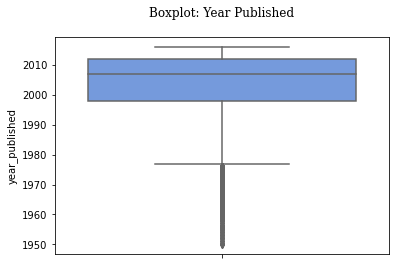

In [16]:
# Statistical overview of Year Published with boxplot using Seaborn

boxplot_year = sns.boxplot(y = df['year_published'], color = 'cornflowerblue').set_title('Boxplot: Year Published', fontname = 'serif', pad=20)

Looking at the distribution of 'year_published', it is noticeable that most of the games in the dataset were published relatively recently. Median and upper quartile are very close to the upper whisker. 

This distribution could also be illustrated with a violin plot. Boxplot shows only a summary statistics with interquartile ranges, with points outside the ranges * 1.5 are outliers, whereas violin plots show the full range of data - where denser regions of data are thicker, and sparser more thin (Carron, 2021). 

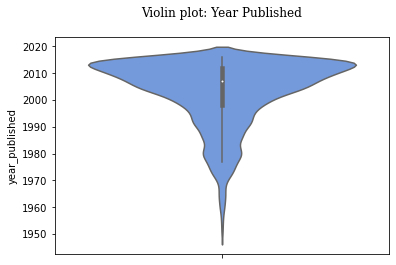

In [17]:
# Violin plot of 'year_published' using Seaborn

violin_year = sns.violinplot(y=df['year_published'], size=10, color = 'cornflowerblue').set_title('Violin plot: Year Published', fontname = 'serif', pad=20);


# 3. Relevant insights

## 3.1. Top 5 “average rated” games

In [18]:
# Sorting the data per average rating and assigning the result to a new dataframe "top_rating"

top5_games = df.sort_values(by = 'average_rating', ascending = False)

top5_games.head()

,name,year_published,category,average_rating,users_rated,min_age,playing_time,max_playtime,mechanic
8348,Small World Designer Edition,2015,"Civilization,Fantasy,Territory Building",9.00392,180,8,80,80,"Area Control / Area Influence,Area Movement,Di..."
6392,Kingdom Death: Monster,2015,"Adventure,Fantasy,Horror,Mature / Adult,Miniat...",8.93184,1954,17,180,180,"Co-operative Play,Dice Rolling,Grid Movement,R..."
9964,Terra Mystica: Big Box,2015,"Civilization,Economic,Fantasy,Territory Building",8.84862,109,12,150,150,"Route/Network Building,Variable Player Powers"
8526,Last Chance for Victory,2014,"American Civil War,Civil War,Wargame",8.84603,88,15,60,60,"Dice Rolling,Hex-and-Counter"
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",2015,"Wargame,World War II",8.83081,86,12,6000,6000,Chit-Pull System


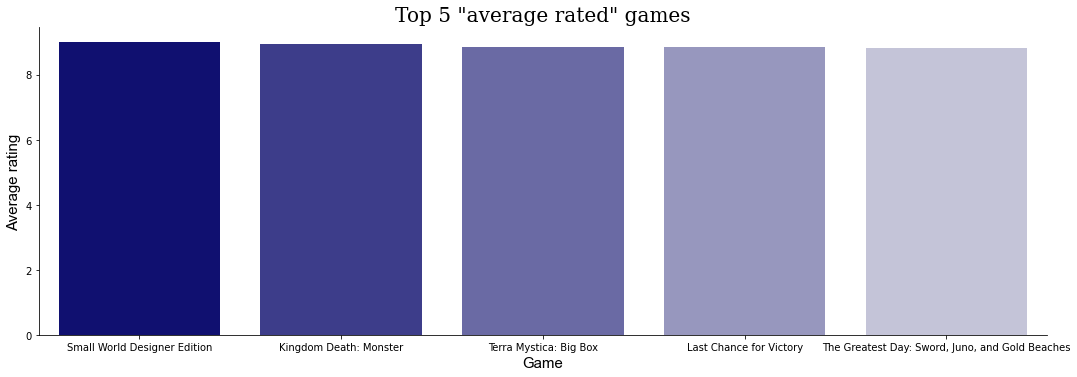

In [19]:
# Plotting top 5 average rated games using Seaborn catplot

sns.catplot(data = top5_games.head(), x = 'name', y = 'average_rating', kind = 'bar', height = 5, aspect = 3,
                            palette = (sns.light_palette("navy", reverse=True)))

plt.title('Top 5 "average rated" games', fontname = 'serif', fontsize = 20)
plt.xlabel('Game', fontname = 'Arial', fontsize = 15)
plt.ylabel('Average rating', fontname = 'Arial', fontsize = 15)

plt.xticks(fontname = 'sans serif', fontsize = 10)
plt.yticks(fontname = 'sans serif', fontsize = 10);

<b> The plot above illustrates the top 5 "average rated" games in the dataset </b>. Bar chart was used, as it shows how the games were rated, in descending order. It is considered as sequential data, therefore a color palette with a subtle shift was used, to naturally draw the eye to the presented data.

## 3.2. Correlation between the “users_rated” and the “max_playtime”

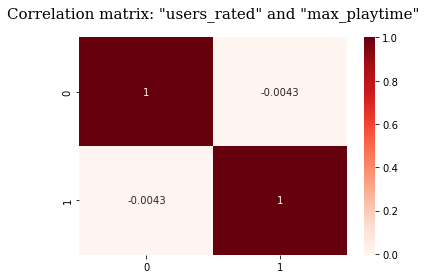

In [20]:
# Plotting a heatmap with Seaborn to check the correlation between “users_rated” and “max_playtime” with Numpy corrcoef

sns.heatmap(np.corrcoef(df['users_rated'], df['max_playtime']), annot = True,  cmap = 'Reds')

plt.title('Correlation matrix: "users_rated" and "max_playtime"',
          fontname = 'serif', fontsize = 15, pad=20);


The heatmap illustrates the correlation between "users_rated" and "max_playtime", <b> the correlation of -0.0043 is very weak and could be considered as no correlation </b> . 'Reds' colormap was chosen, the darker the color the stronger the correlation.

Correlation could be also illustrated with i.e. a scatterplot, however in this case, where there is pretty much no correlation, heatmap is more presentable. 

## 3.3. Distribution of game categories

In [21]:
# Checking the unique values for "category"

df['category'].nunique()

3861

In [22]:
print (df['category'])

0                     Economic,Negotiation,Political
1                                  Card Game,Fantasy
2                         Abstract Strategy,Medieval
3                                            Ancient
4                                           Economic
                            ...                     
10527                            Vietnam War,Wargame
10528    Card Game,Fantasy,Fighting,Video Game Theme
10529                                      Card Game
10530              Miniatures,Racing,Science Fiction
10531                        Card Game,City Building
Name: category, Length: 10532, dtype: object


In [23]:
# Splitting the values in 'category' into a list of single categories

Categories = df['category'].str.split(',').explode('category')

Categories.nunique()

84

In [24]:
# Converting 'Categories' to a dataframe, to be able to create a visualisation

Categories = Categories.to_frame()

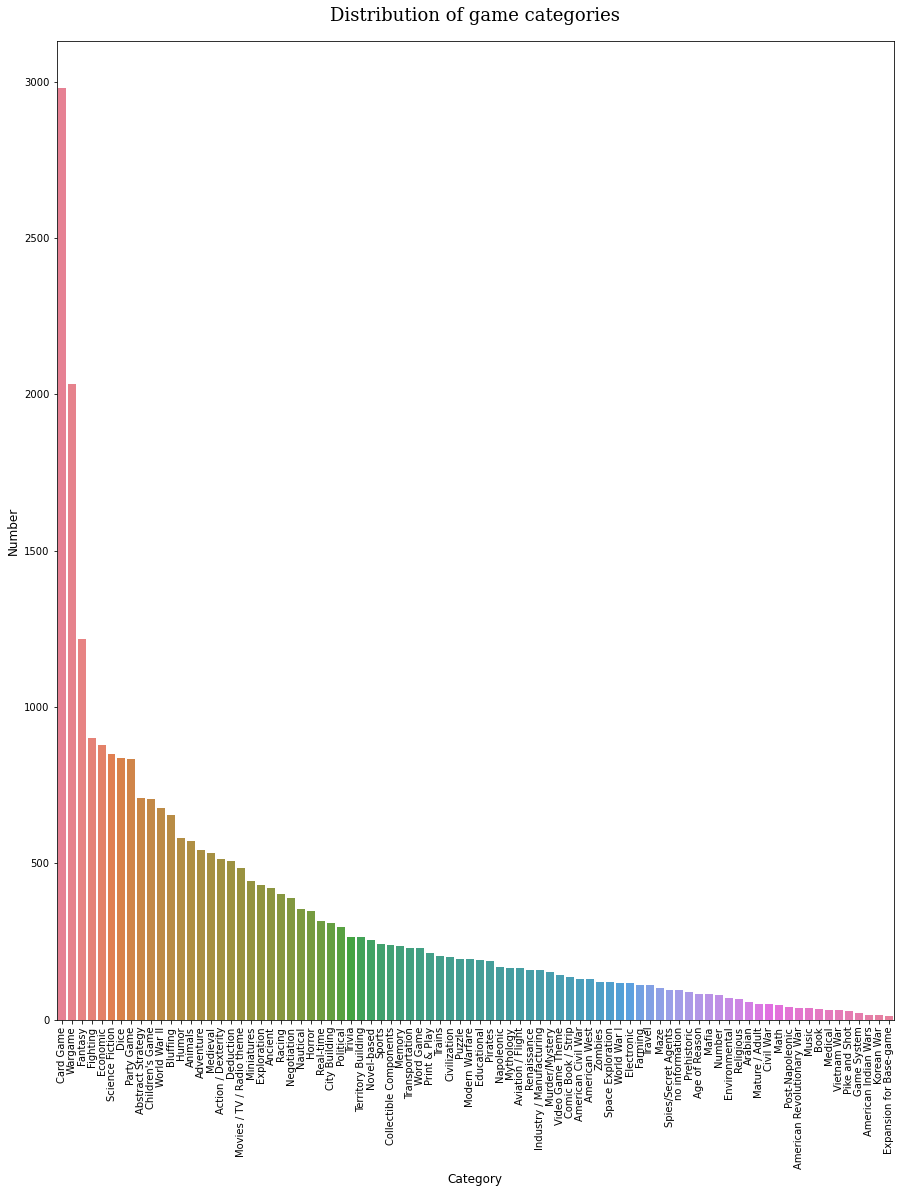

In [49]:
# Plot with 84 evenly spaced hues in the “HUSL” system, as there are 84 unique values in 'Categories'

sns.countplot(x = Categories['category'], order = Categories['category'].value_counts().index,
              palette = (sns.color_palette("husl", 84)))             

# Defining figure size for this and all the following plots 

plt.rcParams['figure.figsize'] = [15, 18]
    
plt.title('Distribution of game categories', fontname = 'serif', fontsize = 18, pad = 20)
                            
plt.xlabel('Category', fontname = 'sans serif', fontsize = 12)
plt.ylabel('Number', fontname = 'sans serif', fontsize = 12)


# 'x' names were rotated to be shown vertically, to make them readable

plt.xticks(rotation = 90, fontname = 'sans serif', fontsize = 10)
plt.yticks(fontname = 'sans serif', fontsize = 10)

plt.show();

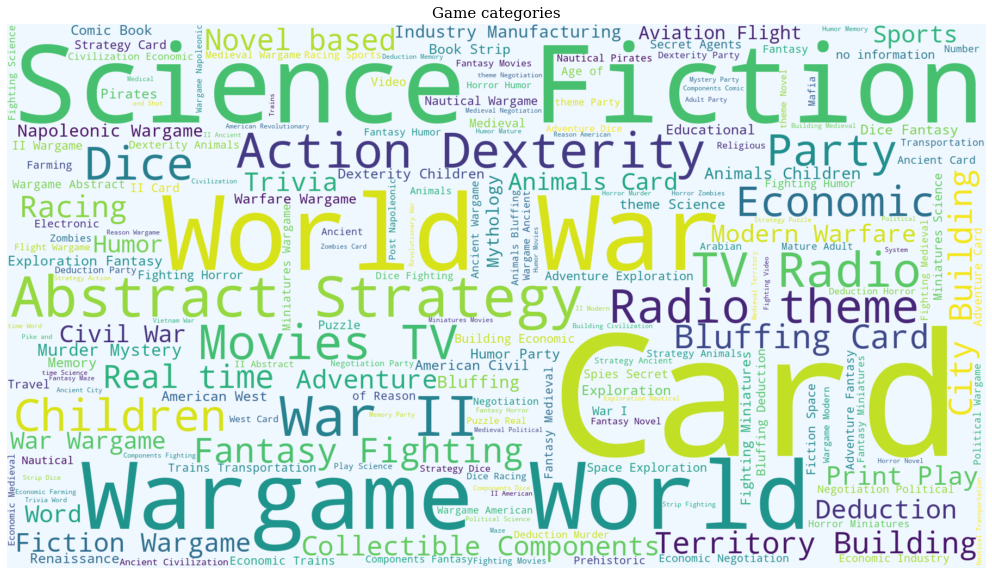

In [26]:
# Game categories illustrated with wordcloud

# Excluding the word 'game' from the visualisation, to improve readability

stop_words = ["game"]

wc= WordCloud(stopwords = stop_words, background_color='aliceblue', height=1000, width =1800)


body =Categories['category'].to_string(index=False)

wc.generate(body)

plt.figure(figsize=(25,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Game categories", fontsize=15, fontname = 'serif');

Originally, multiple categories were included in one observtion, which made it to 3861 unique values. They needed to be divided, which resulted in obtaining 84 single categories. A bar chart was created to illustrate distribution of game categories. However, there are 84 categories displayed - what makes it difficult to read.  
Therefore, another visualisation was created - a word cloud, that shows the most frequent words in the given text - in a more engaging way than a bar chart. 
The larger the word in the visual, the more common it is in the 'category' column; Card games appear most frequently, however there are 3 war-related categories, which considered together may be even more frequent than card games. Stop word was 'game', as a lot of the categories included 'game' in their name (divided with space) - there is only one value, "Wargame" that includes this word - that is because it was not divided by space or comma, instead being a part of the word. 

## 3.4. Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?  

In [27]:
# New dataframe with "year_published" and "average_rating", sorted by "year_published"

df_Year_Rating = df[['year_published', 'average_rating']].sort_values(by = 'year_published', ascending = True)

df_Year_Rating

,year_published,average_rating
2688,1950,5.46696
2074,1950,6.00230
3133,1950,6.54225
2463,1950,5.02264
662,1951,6.79954
...,...,...
10111,2016,7.30039
10113,2016,7.34831
10114,2016,7.52241
8861,2016,8.22778


In [28]:
# Mean rating per year

df_Mean = df_Year_Rating.groupby('year_published', as_index = False).agg({'average_rating': 'mean'})

df_Mean

,year_published,average_rating
0,1950,5.758538
1,1951,5.711550
2,1952,5.680623
3,1953,4.639980
4,1954,5.654670
...,...,...
62,2012,6.557838
63,2013,6.604258
64,2014,6.739433
65,2015,6.871425


In [29]:
# Defining older and newer games by years

Older_games= df[(df['year_published'] <= 1992)]

Newer_games = df[1992 < (df['year_published'])]

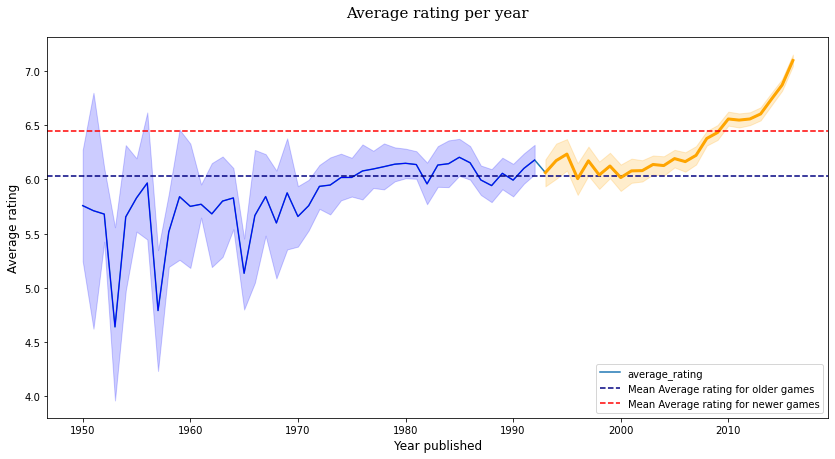

In [30]:
# Plotting average rating for older and newer games

df_Mean.plot(x='year_published', y='average_rating', figsize=(14,7))

ax = sns.lineplot(data = Older_games, x = 'year_published', y = 'average_rating', color = 'blue',
                 linewidth = 1)
ax.axhline(y = Older_games['average_rating'].mean(), color = 'navy', ls = '--',
           label = "Mean Average rating for older games")

ax = sns.lineplot(data = Newer_games, x = 'year_published', y = 'average_rating', color = 'orange',
                 linewidth = 3)
ax.axhline(Newer_games['average_rating'].mean(), color = 'red', ls = '--', 
           label = 'Mean Average rating for newer games')


plt.title('Average rating per year', fontname = 'serif', fontsize = 15, pad = 20)

plt.xlabel('Year published', fontname = 'sans serif', fontsize = 12)
plt.ylabel('Average rating', fontname = 'sans serif', fontsize = 12)

# By default legend was in upper left, but since it was covering a part of the chart, it was moved to the lower right

plt.legend(loc='lower right')
plt.show()

In [31]:
# Newer games mean "average rating"

Newer_games['average_rating'].mean()

6.4463488532216795

In [32]:
# Older games mean "average rating"

Older_games['average_rating'].mean()

6.035236628748707

Linear plot was chosen to illustrate distribution of the average ratings over the years, as it displays data as points over a line, showing the frequency of each value. Legend was moved to the bottom right corner for better readability. Contrasting colors were used to emphasize the difference between older and newer games average ratings, and the '--' lines illustrate the difference in mean average ratings. 

<b> Mean average rating of older games is lower than of newer games. </b> There is an increasing tendency over time. Confidence intervals seem to be wider distributed for older games than for newer, indicating that there's more variety in average rating for older games. 

## 3.5. 3 most common “mechanics” in the dataset

In [33]:
# Checking the unique values for "mechanic"

df['mechanic'].nunique()

3210

In [34]:
# Splitting the values in 'mechanics' into a list of single categories

Mechanics = df['mechanic'].str.split(',').explode('mechanic')

Mechanics.value_counts()

Dice Rolling                     2438
Hand Management                  2176
Set Collection                   1347
Hex-and-Counter                  1244
Variable Player Powers           1223
no information                    950
Tile Placement                    907
Modular Board                     858
Card Drafting                     844
Area Control / Area Influence     803
Auction/Bidding                   682
Roll / Spin and Move              681
Simultaneous Action Selection     631
Area Movement                     593
Action Point Allowance System     582
Simulation                        576
Co-operative Play                 478
Partnerships                      465
Point to Point Movement           461
Memory                            420
Grid Movement                     399
Trading                           359
Worker Placement                  349
Pick-up and Deliver               342
Press Your Luck                   336
Secret Unit Deployment            328
Pattern Buil

In [35]:
# New dataset with 3 most common "mechanics" from the original dataset

Mechanics_top3 = Mechanics.value_counts().nlargest(3)

# Converting Mechanics_top3 to a dataframe 

Mechanics_top3 = Mechanics_top3.to_frame()

Mechanics_top3.rename(columns = {'mechanic': 'count'}, inplace = True)

Mechanics_top3['mechanic'] = Mechanics_top3.index
Mechanics_top3.reset_index(drop = True, inplace = True)

Mechanics_top3

,count,mechanic
0,2438,Dice Rolling
1,2176,Hand Management
2,1347,Set Collection


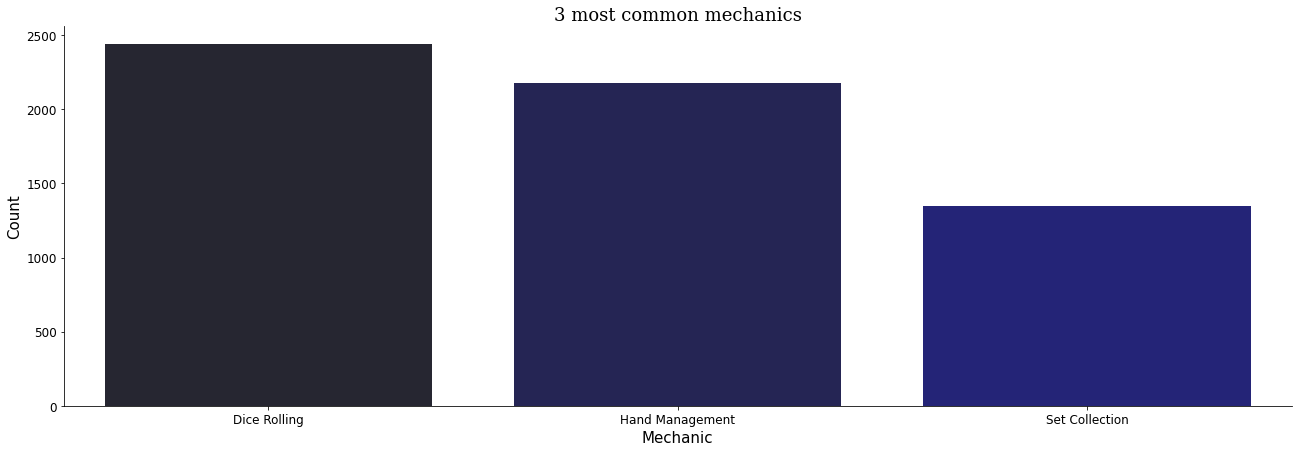

In [36]:
# Plotting the 3 most common mechanics

top3_mec = sns.catplot(data = Mechanics_top3, x = 'mechanic', y = 'count', kind = 'bar', height = 6, aspect = 3 ,
                      palette = (sns.dark_palette("Blue")))

plt.title('3 most common mechanics', fontname = 'serif', fontsize = 18)

plt.xlabel('Mechanic', fontname = 'sans serif', fontsize = 15)
plt.ylabel('Count', fontname = 'sans serif', fontsize = 15)
plt.xticks(fontname = 'sans serif', fontsize = 12)
plt.yticks(fontname = 'sans serif', fontsize = 12);

<b> The above plot shows the 3 most common mechanics in the dataset. </b> Similarly to Categories, mechanics were exploded. After creating a new dataframe with top 3 most frequently occuring mechanics, bar plots were chosen for visualisation, as the data is numerical, showing distribution of top 3 most common mechanics. 

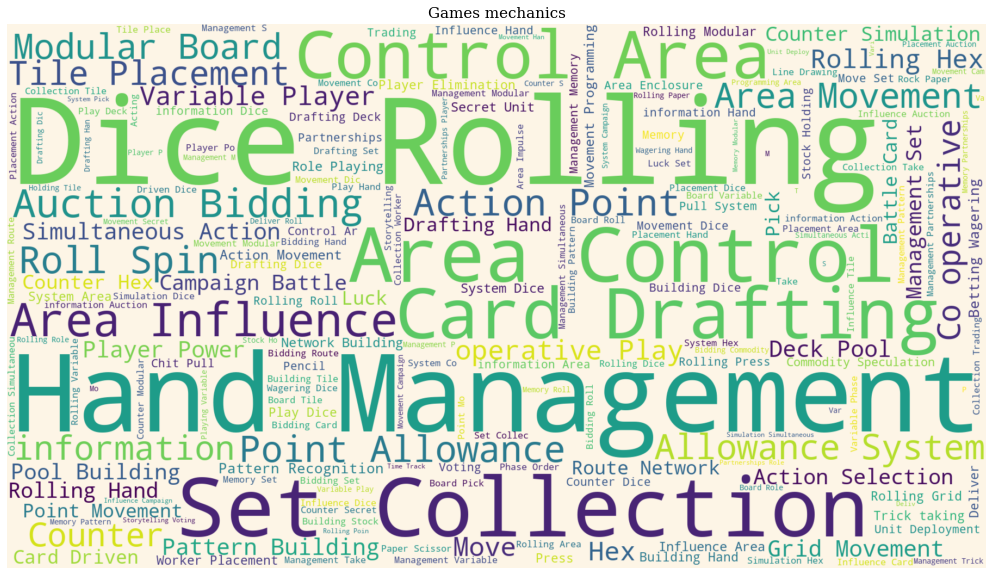

In [37]:
# Common mechanics illustrated with wordcloud, no stopwords were needed

wc= WordCloud(background_color='Oldlace', height=1000, width =1800)

body1 =df['mechanic'].to_string(index=False)

wc.generate(body1)

plt.figure(figsize=(25,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Games mechanics", fontsize=15, fontname = 'serif');

It was also considered as insightful to use word cloud to explore most frequent mechanics in the dataset. Observing the visualisation, it is noticeable that most common mechanics are related to using dice and cards for playing.

## 3.6. Is there a correlation between average rating of a game and age of users? 

It will be analysed whether there is a possibility that minimum recommended age to play a game is correlated with average rating. 

In [38]:
# Unique values of min_age

df['min_age'].unique()

array([14, 12, 10,  8, 13,  9, 18, 16,  6, 11,  0,  7,  4,  5, 15,  3, 17,
       21, 25, 26,  2, 42], dtype=int64)

In [39]:
# Creating age groups, based on 'min_age'

age_group = pd.cut(df['min_age'], bins=[1,7,12,18, np.inf], labels = ['Kids','Older Kids','Teenagers','Adults'])

In [40]:
age_group

0         Teenagers
1        Older Kids
2        Older Kids
3        Older Kids
4        Older Kids
            ...    
10527    Older Kids
10528     Teenagers
10529    Older Kids
10530    Older Kids
10531     Teenagers
Name: min_age, Length: 10532, dtype: category
Categories (4, object): ['Kids' < 'Older Kids' < 'Teenagers' < 'Adults']

In [41]:
# Making the copy of the df before adding a new column 

df1 = df.copy()

In [42]:
# Adding 'age_group' column to the dataset

df1['age_group'] = age_group

In [43]:
df1.head()

,name,year_published,category,average_rating,users_rated,min_age,playing_time,max_playtime,mechanic,age_group
0,Die Macher,1986,"Economic,Negotiation,Political",7.66508,4498,14,240,240,"Area Control / Area Influence,Auction/Bidding,...",Teenagers
1,Dragonmaster,1981,"Card Game,Fantasy",6.60815,478,12,30,30,Trick-taking,Older Kids
2,Samurai,1998,"Abstract Strategy,Medieval",7.44119,12019,10,60,60,"Area Control / Area Influence,Hand Management,...",Older Kids
3,Tal der Könige,1992,Ancient,6.60675,314,12,60,60,"Action Point Allowance System,Area Control / A...",Older Kids
4,Acquire,1964,Economic,7.35830,15195,12,90,90,"Hand Management,Stock Holding,Tile Placement",Older Kids


In [44]:
# Checking the number of values for each age group

df1['age_group'].value_counts()

Older Kids    7345
Teenagers     1511
Kids          1081
Adults           7
Name: age_group, dtype: int64

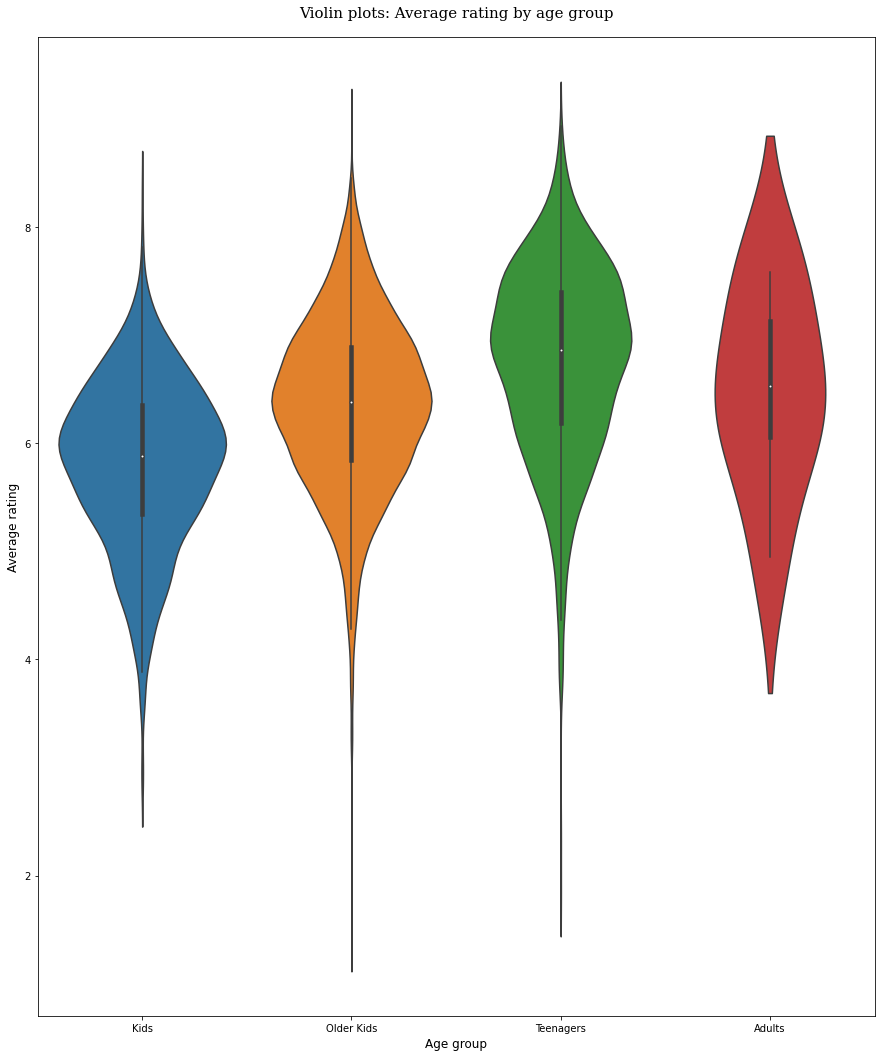

In [45]:
# Exploring 'average_rating' distributions by age group

sns.violinplot(data=df1, x='age_group', y='average_rating').set_title('Violin plots: Average rating by age group', fontsize = 15, fontname = 'serif', pad=20)

plt.xlabel('Age group', fontname = 'sans serif', fontsize = 12)
plt.ylabel('Average rating', fontname = 'sans serif', fontsize = 12)
plt.show();

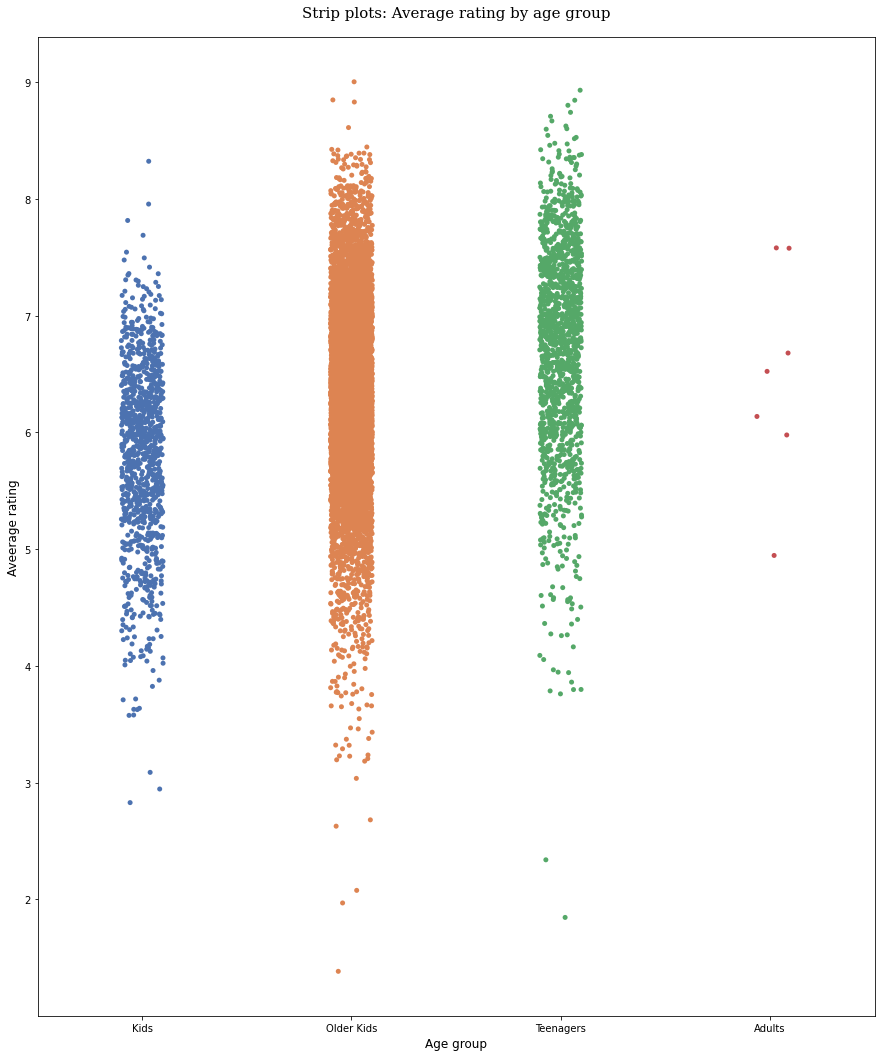

In [46]:
sns.stripplot(data=df1, x="age_group", y="average_rating", palette="deep").set_title('Strip plots: Average rating by age group', fontsize = 15, fontname = 'serif', pad=20)

plt.xlabel('Age group', fontname = 'sans serif', fontsize = 12)
plt.ylabel('Aveerage rating', fontname = 'sans serif', fontsize = 12);

Users age groups were created to be able to identify potential differences and tendencies between them. Age groups were classified according to videostandards.org.uk (n.d.), by the general age classification of games. 

Violin plot was created to illustrate the distribution of average ratings among given age groups. Strip plot was created as a complement the violin plot to show all observations along with the representation of distribution. 

There seem to be a correlation between age group and average rating of a game. 

There is an increasing tendency among for Kids, Older Kids and Teenagers  for average game rating - kids games seem more likely to be given a lower average rating. Games for older kids seem to be most 'varied' in terms of rating, as the lowest game average rating, as well as the highest were given to games with recommended minimum age falling under 'Older Kids' age range. From the very few observations on Adult age group, the games dedicated for adults seem to be rated within 5-8 range. 

However 'Older Kids' age range has 7345 observations, as compared to Teenagers (1511), Kids (1081) and Adults (only 7). Therefore this may not be representative enough. The quality of this analysis could be improved by having a similar number of observations for each age group.


# 4. Justification of design choices


'Serif' and 'sans serif' fonts were selected for all the visualisations, for titles and labels. 'Sans serif' doesn't have small strokes attached to the letters, making them look simple and readable, even for people with low vision (Geniusee, 2021). 'Serif' was used for titles, as it is slightly more eye pleasing, while maintaining readability and clarity (Easil, 2016). Two different fonts were used to differentiate between titles and labels.

'pad=20' was used to sligly elevate titles in a number of visualisations, where the original position of title was too low and looking unesthetic, making  the plot less readable. 

Mainly varieties of blue (blue, navy, dark blue, light blue) were used - as blue is color blind safe (Killin, 2022) and neutral.

For heatmap, 'Reds' was used, as it is an intuitive color to indicate correlation between variables in heatmaps.

The method of choice was different for the bar plot illustrating distribution of categories - since there were 84 categories,  each of them should be represented with a different color. Most of the available palettes don't contain that many colors, therefore "HUSL" was chosen - hues are evenly sampled along a circular path, which is appropriate for categorical data.

The second wordcloud was created with 'oldlace' background, to distinguish it from the first one, and still maintain a light and toned background, to ensure readability. 

Finally, the last 2 plots, violin and strip, were created with the qualitative default seaborn color palette, as it's easy to distinct and eye-pleasing. The same colors were used for these 2 plots, as they both represent the same features, so to maintain consistency and order, the same colors were kept. 

In [47]:
import json

In [48]:
with open('CA1 DVIS.ipynb', encoding='utf-8') as json_file:
    data = json.load(json_file)
    
wordCount = 0
for each in data['cells']:
    cellType = each['cell_type']
    if cellType == "markdown":
        content = each['source']
        for line in content:
            temp = [word for word in line.split() if "#" not in word]
            wordCount = wordCount + len(temp)
            
print(wordCount)

1641


### Reference list 

academy.datawrapper.de. (n.d.). What to consider when choosing colors for data visualization - Datawrapper Academy. [online] Available at: https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization.Carron, J. (2021). 

Violin Plots 101: Visualizing Distribution and Probability Density | Mode. [online] mode.com. Available at: https://mode.com/blog/violin-plot-examples/.Easil (2016). 

The Difference between Serif and Sans-Serif Fonts. [online] Easil. Available at: https://about.easil.com/serif-vs-sans-serif/.France, T. (2020). 

Choosing Fonts for your Data Visualization. [online] Medium. Available at: https://medium.com/nightingale/choosing-a-font-for-your-data-visualization-2ed37afea637.Geniusee (2021). 

Font Readability Research: Key Difference Between Serif Vs Sans Serif Font. [online] Geniusee. Available at: https://geniusee.com/single-blog/font-readability-research-famous-designers-vs-scientists.Killin, I. (2022). 


The best charts for color blind viewers | Blog | Datylon. [online] www.datylon.com. Available at: https://www.datylon.com/blog/data-visualization-for-colorblind-readers.pandas.pydata.org. (n.d.). 

Chart Visualization — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/visualization.html.pandas.pydata.org. (n.d.). 

Styling — pandas 0.24.1 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/version/0.24.1/user_guide/style.html [Accessed 19 Apr. 2023].Seaborn (n.d.). 

Choosing color palettes — seaborn 0.9.0 documentation. [online] man.hubwiz.com. Available at: http://man.hubwiz.com/docset/Seaborn.docset/Contents/Resources/Documents/tutorial/color_palettes.html [Accessed 19 Apr. 2023].Simplilearn (2021). 

What is Dimensionality Reduction? Overview, and Popular Techniques. [online] Simplilearn.com. Available at: https://www.simplilearn.com/what-is-dimensionality-reduction-article.videostandards.org.uk. (n.d.). 

Video Standards Council Ratings Board. [online] Available at: https://videostandards.org.uk/RatingBoard/ratings [Accessed 2023].Yi, M. (2021a). 

A Complete Guide to Box Plots. [online] Chartio. Available at: https://chartio.com/learn/charts/box-plot-complete-guide/.Yi, M. (2021b). 

How to Choose Colors for Data Visualizations. [online] Chartio. Available at: https://chartio.com/learn/charts/how-to-choose-colors-data-visualization/.Yi, M. and Restori, M. (n.d.). 


How to Choose the Right Data Visualization. [online] Chartio. Available at: https://chartio.com/learn/charts/how-to-choose-data-visualization/.